### BMEN 509 

####  Final Project 

Tien Dat Johny Do & Ibrahim Asad 

# Objective 1 - Find Cell image from Cell image library

Text(0.5, 1.0, 'Original Segmentation Image')

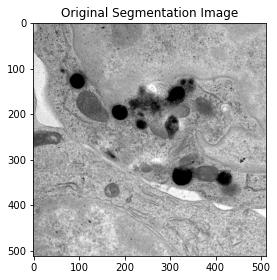

In [17]:
# Load in image from dataset 
# Image is Tomogram of the immunological synapse between a human cytotoxic T lymphocyte (CTL) and a target cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
from skimage import exposure

plt.subplots(1,1, figsize = (30, 30))

#knee_ct2.tif Visualizing
image_path = 'BMEN 509 - Segmentation.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.subplot(6,1,1); plt.imshow(image, cmap = 'gray')
plt.title("Original Segmentation Image")


# Objective 2 - Noise reduction, Contrast, and Normalization 

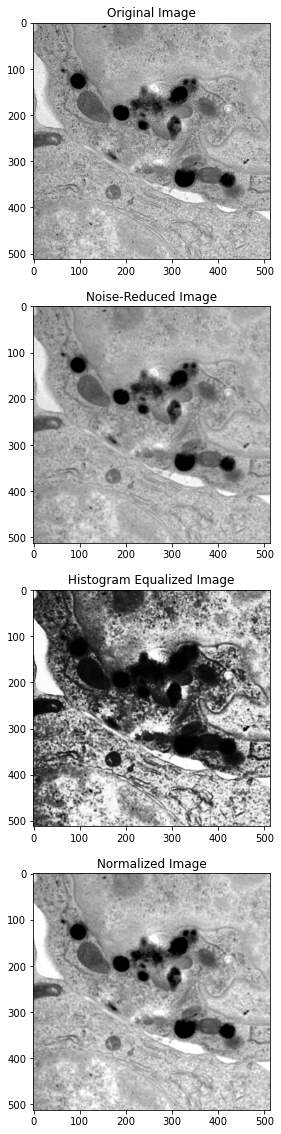

In [18]:

# Load image
image_path = 'BMEN 509 - Segmentation.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Noise Reduction
image_smoothed = gaussian_filter(image, sigma=1)

# Contrast Enhancement
# Method 1: Histogram Equalization
image_equalized = cv2.equalizeHist(image_smoothed)

# Method 2: Contrast Stretching
p2, p98 = np.percentile(image_smoothed, (2, 98))
image_stretched = exposure.rescale_intensity(image_smoothed, in_range=(p2, p98))

# Normalization
image_normalized = cv2.normalize(image_stretched, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Displaying images
plt.figure(figsize=(20, 20))

plt.subplot(4, 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(4, 1, 2)
plt.imshow(image_smoothed, cmap='gray')
plt.title("Noise-Reduced Image")

plt.subplot(4, 1, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title("Histogram Equalized Image")

plt.subplot(4, 1, 4)
plt.imshow(image_normalized, cmap='gray')
plt.title("Normalized Image")

plt.show()

# Objective 3 - Thresholding, edge detection, and final refinements 

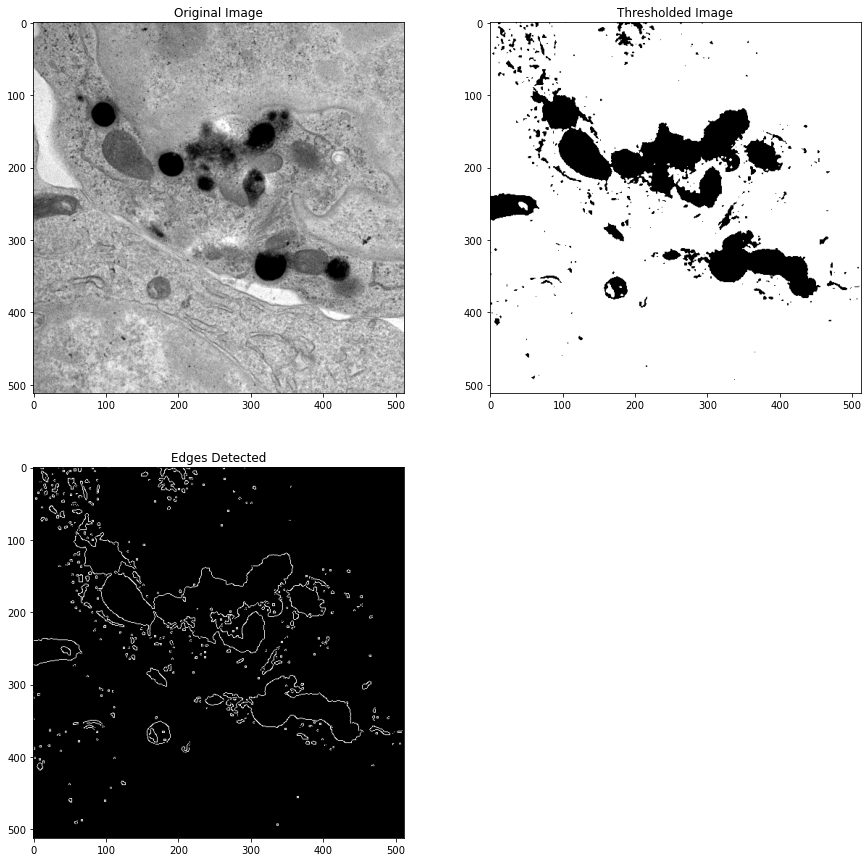

In [19]:
# Noise Reduction
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(image_smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(thresh, 30, 100)

# Refinement (Optional)
# You can apply morphological operations like dilation or erosion to refine the edges if needed.
# Example: edges = cv2.dilate(edges, None, iterations=3)

# Displaying images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")

plt.show()

# Objective 4 - Label area/regions

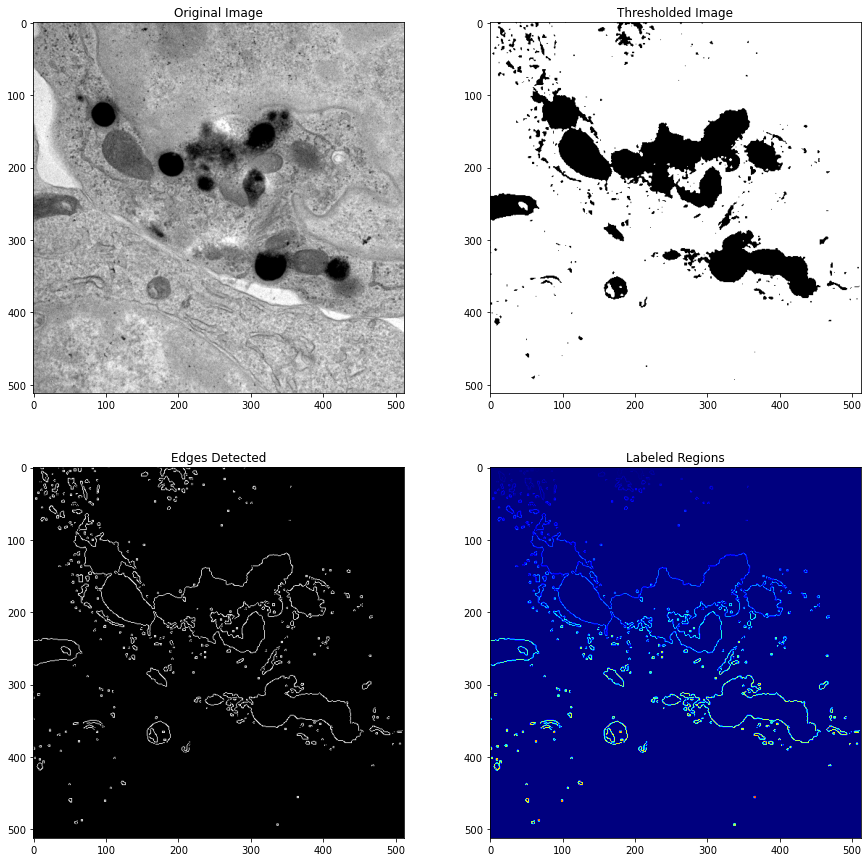

In [20]:
# Noise Reduction
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(image_smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(thresh, 30, 100)

# Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(edges)

# Display labeled regions
label_image = np.zeros_like(image)
for label in range(1, num_labels):
    label_image[labels == label] = label * 255 / num_labels

# Displaying images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")

plt.subplot(2, 2, 4)
plt.imshow(label_image, cmap='jet')
plt.title("Labeled Regions")

plt.show()

# Objective 5 - Create Mask 

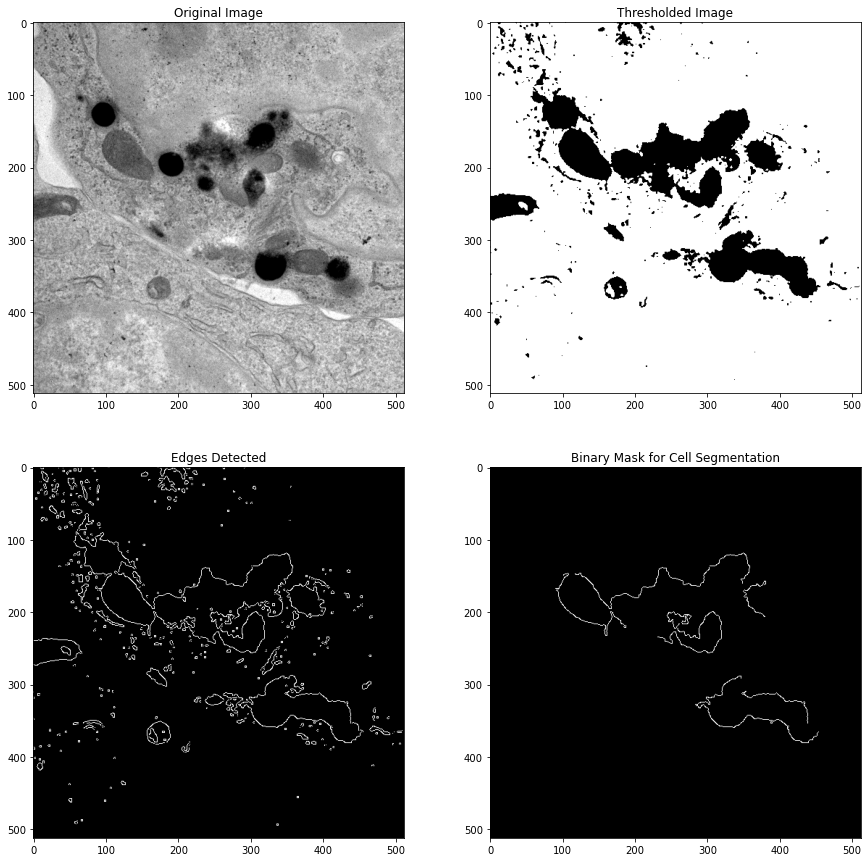

In [21]:
# Noise Reduction
image_smoothed = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(image_smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(thresh, 30, 100)

# Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(edges)

# Creating a binary mask for cell segmentation
binary_mask = np.zeros_like(image, dtype=np.uint8)
for label in range(1, num_labels):
    # Filter regions based on area (adjust the min and max area thresholds as needed)
    area = stats[label, cv2.CC_STAT_AREA]
    if 100 < area < 10000:  # Example area thresholds for cells
        # Draw the region on the binary mask
        binary_mask[labels == label] = 255

# Displaying images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")

plt.subplot(2, 2, 4)
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Mask for Cell Segmentation")

plt.show()

# Objective 6 - Visulization of the Mask and Original Image 

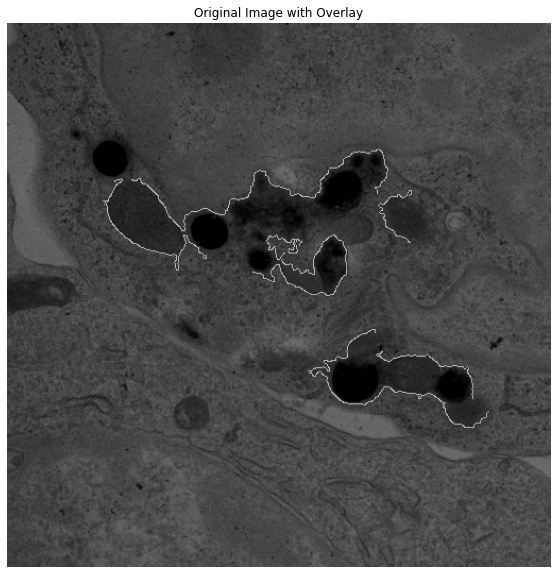

In [22]:
# Convert image to grayscale

image = cv2.imread(image_path)

# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Noise Reduction
image_smoothed = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(image_smoothed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Edge Detection
edges = cv2.Canny(thresh, 30, 100)

# Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(edges)

# Creating a binary mask for cell segmentation
binary_mask = np.zeros_like(image_gray, dtype=np.uint8)
for label in range(1, num_labels):
    # Filter regions based on area (adjust the min and max area thresholds as needed)
    area = stats[label, cv2.CC_STAT_AREA]
    if 100 < area < 10000:  # Example area thresholds for cells
        # Draw the region on the binary mask
        binary_mask[labels == label] = 255

# Apply transparency to the binary mask
mask_with_alpha = cv2.merge([binary_mask, binary_mask, binary_mask])

# Set transparency level (adjust as needed)
alpha = 0.5

# Blend the original image and the mask
overlay = cv2.addWeighted(image, 1-alpha, mask_with_alpha, alpha, 0)

# Display the overlay
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Overlay")
plt.axis('off')
plt.show()